In [82]:
import pandas as pd
import networkx as nx
import random as rd
import matplotlib.pyplot as plt

side_path = '公交线路-对偶.csv'
dot_path = '公交站点-对偶.csv'
#请用公交数据处理.py处理过的数据进行使用
#只要格式与范例数据一样也可使用

In [83]:
side1 = pd.read_csv(side_path, encoding='gbk')
dot1 = pd.read_csv(dot_path, encoding='gbk')
side_b = pd.DataFrame(side1)
dot2 = pd.DataFrame(dot1)
side_b

,source,target,Weight
0,100路(草海公交首末站--小菜园立交桥),101路(眠山车场--小菜园立交桥5),3
1,100路(草海公交首末站--小菜园立交桥),104路(大观楼(大观路)--巴士家园),1
2,100路(草海公交首末站--小菜园立交桥),113路(大漾田公交首末站--潘家湾(人民西路)),1
3,100路(草海公交首末站--小菜园立交桥),115路(西苑立交桥--蓝龙潭车场),1
4,100路(草海公交首末站--小菜园立交桥),124路(艺术剧院--大观楼车场),1
...,...,...,...
1887,Z86路(眠山车场--眠山车场),Z86路(眠山车场--眠山车场),1
1888,Z87路(马街--西山区政府(秀苑路)),Z113路(马街(春雨路)--马街中村),1
1889,Z8路(昆明南站西广场--雨花公交枢纽站),Z15路(高新区管委会(马金铺)--雨花公交枢纽站),1
1890,Z8路(昆明南站西广场--雨花公交枢纽站),Z26路(万峰街东口--雨花公交枢纽站),1


In [84]:

dot = list(dot2.iloc[:, 0])

In [85]:
def degree_averge(G):
    degree = nx.degree_histogram(G)
    i = 0
    i1 = 0
    i2 = 0
    for s in degree:
        i1 += i * s
        i += 1
        i2 += s
    f = i1 / i2
    return f



In [86]:
def attack(dot, side_b):
    G1 = nx.Graph()

    nodes = []
    for i in dot:
        a = rd.random()
        if p <= a:
            G1.add_node(i)

            nodes.append(i)
        else:
            side_b = side_b[~side_b['source'].isin([i])]
            side_b = side_b[~side_b['target'].isin([i])]
    side_q = list(side_b.iloc[:, 0])
    side_z = list(side_b.iloc[:, 1])
    for i in range(0, len(side_z) - 1):
        G1.add_edge(side_q[i], side_z[i])
    return G1

In [87]:
p = 0
G2 = attack(dot, side_b)
datas = pd.DataFrame(G2.degree())
datas = datas.sample(frac=1)
d = datas.shape[0]
a=[]
for i in range(0, 100):
    b =int(i/100*d)
    data1 = datas.iloc[0:b, 0]
    G2.remove_nodes_from(data1)
    a.append(nx.global_efficiency(G2))
a




[0.25220292415332296,
 0.2528191087743696,
 0.2537668797629456,
 0.25117438964446975,
 0.2502382157031854,
 0.2482374698305365,
 0.24690367569549515,
 0.24557625649098683,
 0.24230270935748882,
 0.23839570169600569,
 0.23746074268444387,
 0.23403772691757796,
 0.23698447962196934,
 0.23511406271874963,
 0.23446284700737904,
 0.2355156911627383,
 0.23414649893051023,
 0.23319822890946024,
 0.2343804380991112,
 0.23503891006402433,
 0.23753351744174558,
 0.23545040867028755,
 0.2346836937082707,
 0.23290394070224738,
 0.2327103456919001,
 0.23058915315716333,
 0.22689257109889324,
 0.22601254973496654,
 0.22546484102042835,
 0.22459510544155026,
 0.2236235055325264,
 0.2232113010672636,
 0.2248993806023059,
 0.22559307037577217,
 0.22701021239166602,
 0.22303631852877467,
 0.2246362425805978,
 0.2228367852867194,
 0.2183289469508313,
 0.21977135939853182,
 0.21609034279517284,
 0.2192258920331611,
 0.22092059592065527,
 0.22174289599723512,
 0.22110334649861563,
 0.21881696387424995,
 0.

In [88]:
p = 0
G = attack(dot, side_b)
datas = pd.DataFrame(G.degree())
datas = datas.sort_values(by=1, ascending=False)
d = datas.shape[0]
c=[]
for i in range(0, 100):
    b =int(i/100*d)
    data1 = datas.iloc[0:b, 0]
    G.remove_nodes_from(data1)
    c.append(nx.global_efficiency(G))
c

[0.25220292415332296,
 0.2480675560145663,
 0.2444499134289015,
 0.2383805557285003,
 0.23562935341984073,
 0.23234400489732823,
 0.22892419068421935,
 0.22490338643932575,
 0.22027329424026412,
 0.21532391741743315,
 0.21229099098621063,
 0.20749059358615665,
 0.20422109747110367,
 0.20108485730367776,
 0.19837524957769795,
 0.1939699207041949,
 0.19135777583345132,
 0.18586788874931065,
 0.18024032642129328,
 0.17515222970126137,
 0.17285940390504423,
 0.17011977990530358,
 0.16581624429552433,
 0.16209372299246577,
 0.15668400684675654,
 0.15278186854016948,
 0.14722784793508448,
 0.14266822567042994,
 0.14014425990539744,
 0.1341287840276018,
 0.1294305448904243,
 0.1251290699358392,
 0.11557647281982224,
 0.10566331593588234,
 0.10047472899167037,
 0.09586458287666329,
 0.09166497035191742,
 0.08128933671084354,
 0.07111114779217856,
 0.06622744932444116,
 0.058540325395493906,
 0.055575763616362926,
 0.05506020371813221,
 0.05429920040729074,
 0.049944394245964474,
 0.04750626455

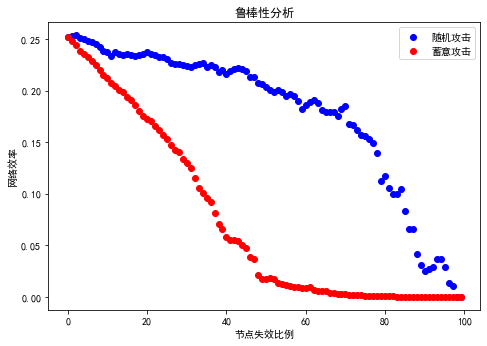

In [89]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
grades_range = range(0, 100, 1)
plt.rcParams["font.sans-serif"] = ["SimHei"]  #设置字体
plt.rcParams["axes.unicode_minus"] = False  #正常显示负号
ax.scatter(grades_range, a, color='b', label="随机攻击")
ax.scatter(grades_range, c, color='r', label="蓄意攻击")
ax.set_xlabel('节点失效比例')
ax.set_ylabel('网络效率')
ax.set_title('鲁棒性分析')
#添加图例
plt.legend()
plt.show()

In [90]:
datas


,0,1
74,96路(永昌小区(华昌路)--北部公交枢纽站),29
101,127路(海源寺车场--商汇路),28
54,75路(西南林业大学(南院路)--眠山车场),26
103,129路(逸雅路口(华晨路)--北市区车场),25
89,115路(西苑立交桥--蓝龙潭车场),25
...,...,...
320,K47路(地铁机场前站--津桥学院),0
415,Z121路(世纪城乘车点--大都购物中心(彩云北路)),0
172,217路(小营社区--高登村),0
417,Z123路(春融街地铁站C口--白龙潭淏园1号门),0
